In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('guide_8bits.bmp',0)

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
def make_dict(arr):
    d = dict()
    for i in arr:
        for j in i:
            if(j not in d.keys()):
                d[j] = 1
            else:
                d[j] +=1
    return d
def calculate_probability(d,sum_):
    dic=dict()
    for i in d.keys():
        dic[i] = d[i] / sum_
    return dic
def calculate_cumilative_probability(d):
    dic =dict()
    sum_=0
    for i in d.keys():
        sum_ += d[i]
        dic[i] =sum_
    return dic
def update_image(img,my_dict):
    m,n = img.shape
    for i in range(0,m-1):
        for j in range(0,n-1):
            img[i][j]= my_dict[img[i][j]]
    return img

In [ ]:
#img = rgb2gray(img)
d= make_dict(img)
probability = calculate_probability(d,sum(d.values()))
cum = calculate_cumilative_probability(probability)
cum.update((x, round(y*255)) for x, y in cum.items())
new_image = update_image(img,cum)
cv2.imwrite("new_image.jpg",new_image)

True

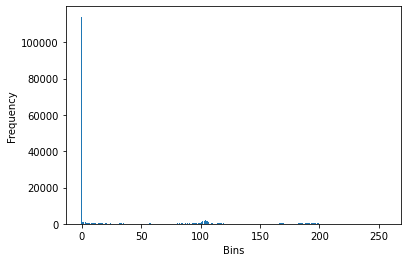

In [ ]:
x=[]
y=[]
sum=0
for x1,y1 in d.items():
    x.append(x1)
    y.append(y1)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.savefig("Initial_graph.jpg")

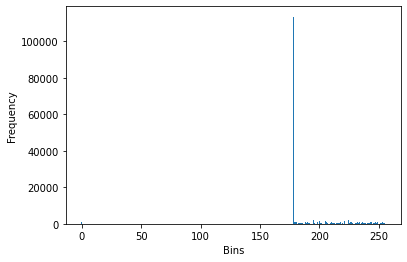

In [ ]:
x=[]
y=[]
sum=0
for x1,y1 in make_dict(new_image).items():
    x.append(x1)
    y.append(y1)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.savefig("FinalGraph.jpg")